In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [3]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars'] 

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

fuel_econ.VClass = fuel_econ.VClass.astype(vclasses)

In [4]:
fuel_econ.trans.value_counts()

Automatic (S8)                      814
Automatic (S6)                      739
Manual 6-spd                        658
Automatic (AM-S7)                   226
Automatic 7-spd                     212
Automatic (variable gear ratios)    178
Automatic 8-spd                     138
Automatic 6-spd                     126
Manual 5-spd                        126
Automatic (S7)                       98
Automatic (AM-S6)                    91
Manual 7-spd                         77
Automatic (AM6)                      75
Automatic (AM7)                      63
Automatic 9-spd                      62
Automatic (AV-S6)                    43
Automatic (AV-S7)                    43
Automatic 5-spd                      33
Automatic (AM-S8)                    27
Automatic 4-spd                      25
Automatic (AV-S8)                    22
Automatic (S5)                       14
Automatic (S9)                       14
Automatic (S10)                      13
Automatic (A1)                        7


In [36]:
fuel_type = []
for trans in fuel_econ.trans:
    fuel_type.append(trans.split()[0])
fuel_econ['trans_type'] = fuel_type   
fuel_econ['trans_type'].value_counts()

Automatic    3068
Manual        861
Name: trans_type, dtype: int64

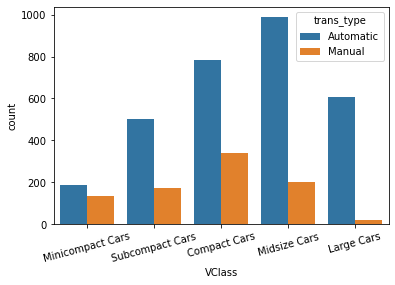

In [37]:
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type')
plt.xticks(rotation=15);

In [60]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [61]:
ct_counts = ct_counts.reset_index(name='count')
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [63]:
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


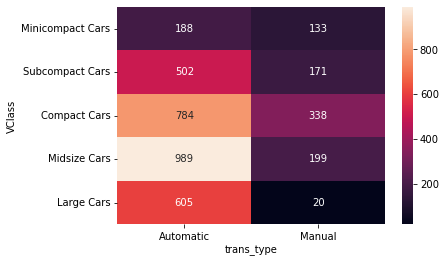

In [64]:
sb.heatmap(ct_counts, annot = True, fmt = 'd');